**Key tasks:**

1. to visualize the data and find patterns (seasonal fluctuations --> SARIMAX)

2. to forecast the contract prices for the next year (12 time steps)


In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
nat_gas = pd.read_csv("/content/Nat_Gas.csv",index_col=0)
nat_gas

,Prices
Dates,
10/31/20,10.10
11/30/20,10.30
12/31/20,11.00
1/31/21,10.90
2/28/21,10.90
3/31/21,10.90
4/30/21,10.40
5/31/21,9.84
6/30/21,10.00


In [3]:
nat_gas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 10/31/20 to 9/30/24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Prices  48 non-null     float64
dtypes: float64(1)
memory usage: 768.0+ bytes


In [4]:
nat_gas.index

Index(['10/31/20', '11/30/20', '12/31/20', '1/31/21', '2/28/21', '3/31/21',
       '4/30/21', '5/31/21', '6/30/21', '7/31/21', '8/31/21', '9/30/21',
       '10/31/21', '11/30/21', '12/31/21', '1/31/22', '2/28/22', '3/31/22',
       '4/30/22', '5/31/22', '6/30/22', '7/31/22', '8/31/22', '9/30/22',
       '10/31/22', '11/30/22', '12/31/22', '1/31/23', '2/28/23', '3/31/23',
       '4/30/23', '5/31/23', '6/30/23', '7/31/23', '8/31/23', '9/30/23',
       '10/31/23', '11/30/23', '12/31/23', '1/31/24', '2/29/24', '3/31/24',
       '4/30/24', '5/31/24', '6/30/24', '7/31/24', '8/31/24', '9/30/24'],
      dtype='object', name='Dates')

In [5]:
nat_gas.index = pd.to_datetime(nat_gas.index)
nat_gas.index

<ipython-input-5-6c7fb81cc9b1>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nat_gas.index = pd.to_datetime(nat_gas.index)


DatetimeIndex(['2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31',
               '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31',
               '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30',
               '2021-10-31', '2021-11-30', '2021-12-31', '2022-01-31',
               '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31',
               '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30',
               '2022-10-31', '2022-11-30', '2022-12-31', '2023-01-31',
               '2023-02-28', '2023-03-31', '2023-04-30', '2023-05-31',
               '2023-06-30', '2023-07-31', '2023-08-31', '2023-09-30',
               '2023-10-31', '2023-11-30', '2023-12-31', '2024-01-31',
               '2024-02-29', '2024-03-31', '2024-04-30', '2024-05-31',
               '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30'],
              dtype='datetime64[ns]', name='Dates', freq=None)

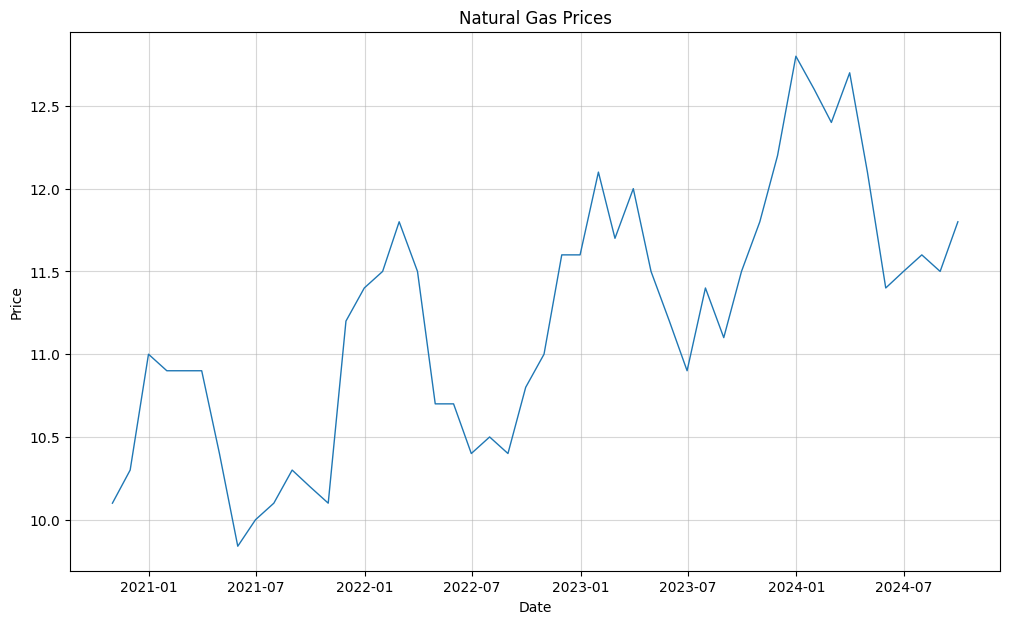

In [6]:
plt.figure(figsize=(12, 7))
plt.xlabel("Date")
plt.ylabel("Price")
plt.plot(nat_gas.index, nat_gas["Prices"], linewidth=1)
plt.title("Natural Gas Prices")
plt.grid(True, alpha=0.5)
plt.show()

In [7]:
nat_gas["MA_4"]=nat_gas.Prices.rolling(4).mean()
nat_gas["MA_12"]=nat_gas.Prices.rolling(12).mean()
nat_gas

,Prices,MA_4,MA_12
Dates,,,
2020-10-31,10.10,NaN,NaN
2020-11-30,10.30,NaN,NaN
2020-12-31,11.00,NaN,NaN
2021-01-31,10.90,10.575,NaN
2021-02-28,10.90,10.775,NaN
2021-03-31,10.90,10.925,NaN
2021-04-30,10.40,10.775,NaN
2021-05-31,9.84,10.510,NaN
2021-06-30,10.00,10.285,NaN


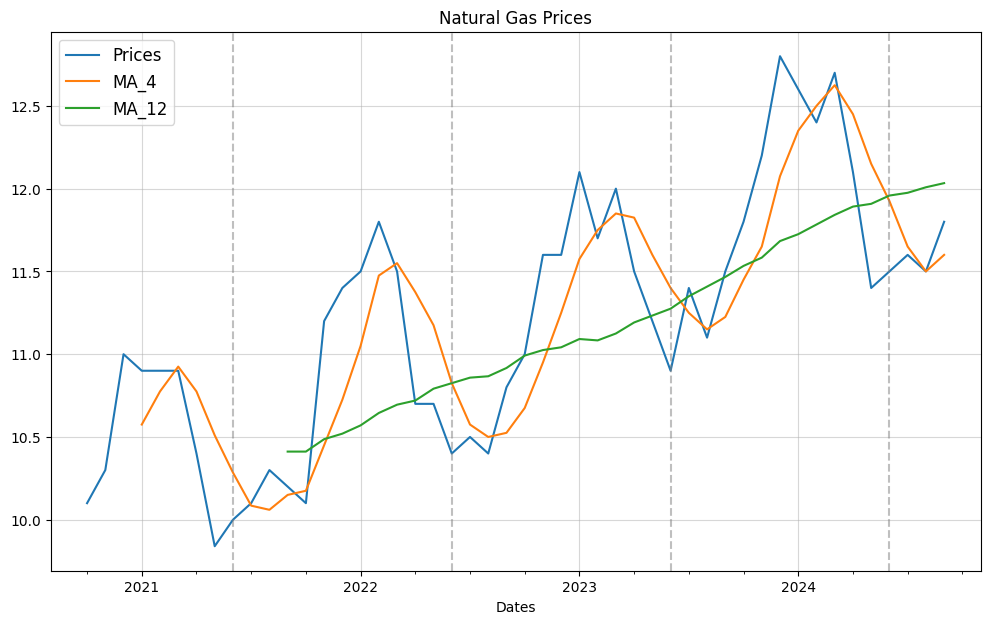

In [8]:
nat_gas.loc[:,["Prices","MA_4","MA_12"]].plot(figsize=(12,7))
plt.legend(loc="upper left",fontsize=12)
plt.title("Natural Gas Prices")
plt.grid(True, alpha=0.5)

# Add padding for better visualization
padding = pd.DateOffset(months=2)
plt.xlim(nat_gas.index.min() - padding, nat_gas.index.max() + padding)

for year in range(nat_gas.index.year.min(), nat_gas.index.year.max() + 1):
    june_date = pd.to_datetime(f"{year}-06-30")
    plt.axvline(x=june_date, color='gray', linestyle='--', alpha=0.5)

plt.show()

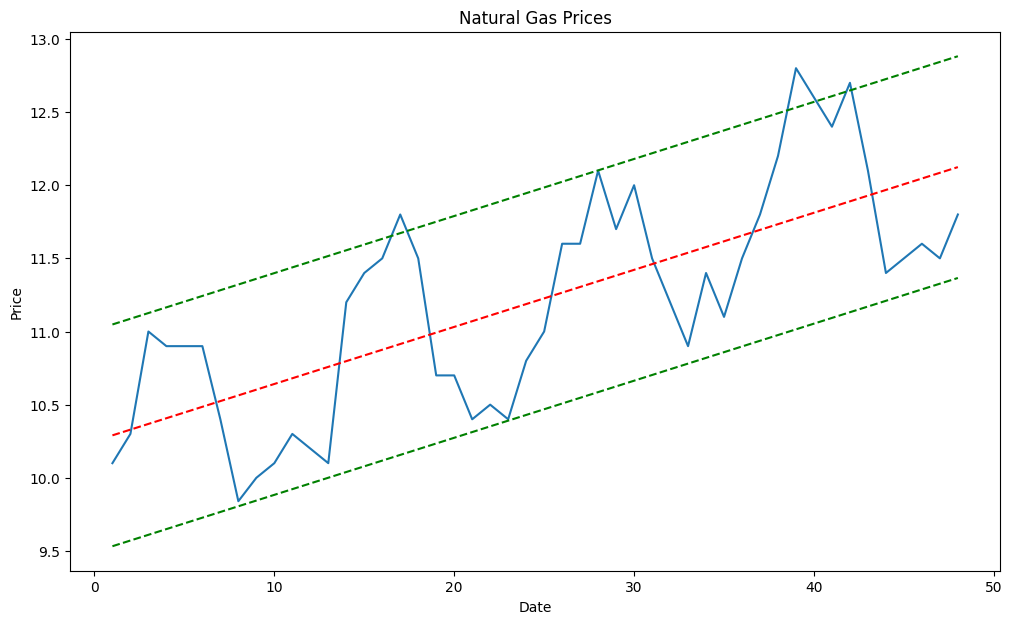

In [9]:
time = np.arange(1, len(nat_gas) + 1)
nat_gas['time'] = time
data = nat_gas[['time', 'Prices']]

regress = np.polyfit(data['time'], data["Prices"], deg = 1)
regress

trend = np.polyval(regress, data['time'])
std = data['Prices'].std()
plt.figure(figsize=(12,7))
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Natural Gas Prices")
plt.plot(data['time'].values, data['Prices'].values)
plt.plot(data['time'].values, trend, 'r--')
plt.plot(data['time'].values, trend - std, 'g--')
plt.plot(data['time'].values, trend + std, 'g--');

<Axes: xlabel='Dates'>

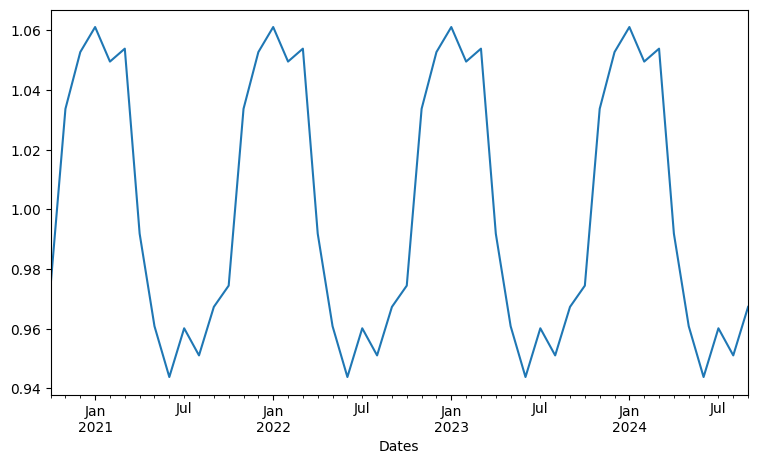

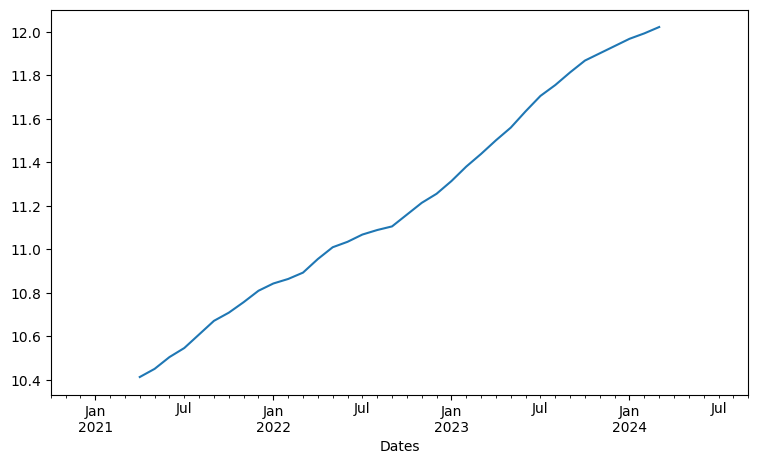

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(nat_gas['Prices'], model='multiplicative',period = 12)

plt.figure(figsize = (9,5))
result.seasonal.plot();

plt.figure(figsize = (9,5))
result.trend.plot()

## **Forecasting with SARIMAX**

In [ ]:
!pip install pmdarima numpy==1.24.4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

nat_gas_df = pd.read_csv("/content/Nat_Gas.csv",index_col=0)
nat_gas_df.index = pd.to_datetime(nat_gas_df.index)

from statsmodels.tsa.stattools import adfuller
test_result = adfuller(nat_gas_df['Prices'])

#H0: The time series is non-stationary
#H1: The time series is stationary

def adf_test(Prices):
    result = adfuller(Prices)
    labels = ['ADF Test Statistic','p-value','Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        if label in ['ADF Test Statistic', 'p-value']:
          print(f"{label} : {value:.4f}")
        else:
          print(label + ' : ' + str(value))
    if result[1] <= 0.05:
        print("\nDecision: Failed to reject H0, the time series do not have a unit root.")
    else:
        print("\nDecision: Reject H0, the time series has a unit root.")

adf_test(nat_gas_df['Prices'])

<ipython-input-1-a82b1b0c756a>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nat_gas_df.index = pd.to_datetime(nat_gas_df.index)


ADF Test Statistic : 0.2181
p-value : 0.9733
Lags Used : 10
Number of Observations Used : 37

Decision: Reject H0, the time series has a unit root.


In [2]:
from pmdarima import auto_arima
from pmdarima.model_selection import train_test_split
from tabulate import tabulate

import warnings
warnings.filterwarnings('ignore')

model = auto_arima(nat_gas_df['Prices'], seasonal=True, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

print("\nBest ARIMA model summary:")
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=35.910, Time=0.88 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=48.334, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=50.098, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=50.139, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=46.741, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=53.197, Time=0.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=53.566, Time=0.26 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=53.701, Time=1.67 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=53.674, Time=1.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=51.953, Time=0.43 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=54.043, Time=1.46 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.20 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.96 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.54 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 11.114 

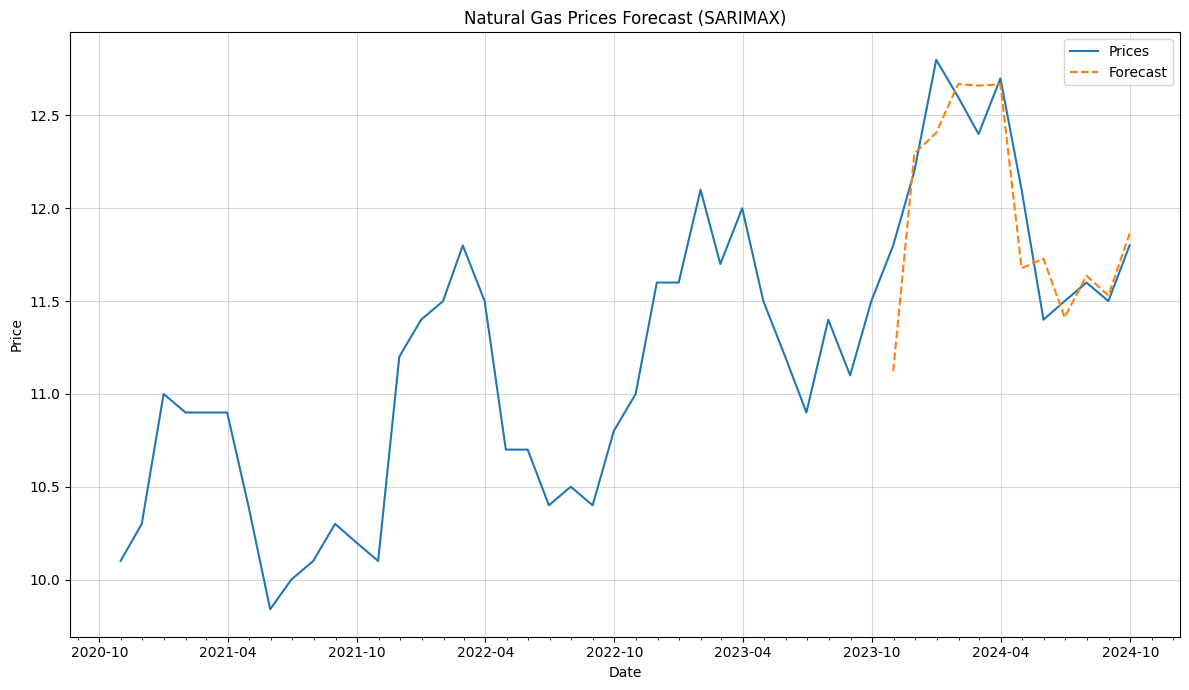

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

train_size = len(nat_gas_df) - 12
train_data = nat_gas_df.iloc[:train_size]
test_data = nat_gas_df.iloc[train_size:]

sarima_model = SARIMAX(train_data['Prices'],
                       order=(2,1,2),
                       seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit()

forecast = sarima_result.predict(start=test_data.index[0],
                                 end=test_data.index[-1],
                                 dynamic=True)

import matplotlib.dates as mdates

plt.figure(figsize=(12,7))
plt.plot(nat_gas_df.index, nat_gas_df['Prices'], label='Prices')
plt.plot(test_data.index, forecast, label='Forecast', linestyle='--')

ax = plt.gca()

# major ticks
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# minor ticks
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))

plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Natural Gas Prices Forecast (SARIMAX)")
plt.legend()
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()


In [4]:
test_data['ARIMA_Predictions'] = forecast
test_data

,Prices,ARIMA_Predictions
Dates,,
2023-10-31,11.8,11.122253
2023-11-30,12.2,12.294544
2023-12-31,12.8,12.406897
2024-01-31,12.6,12.669003
2024-02-29,12.4,12.661022
2024-03-31,12.7,12.667272
2024-04-30,12.1,11.677441
2024-05-31,11.4,11.728602
2024-06-30,11.5,11.412137


In [5]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

def calculate_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

rmse = rmse(test_data['Prices'], forecast)
mape = calculate_mape(test_data['Prices'], forecast)
print(f'RMSE: {rmse:.4f}\nMAPE: {mape:.4f}%')

RMSE: 0.2883
MAPE: 1.7293%


In [6]:
full_model = SARIMAX(nat_gas_df['Prices'],
                     order=(2, 1, 2),
                     seasonal_order=(1, 1, 1, 12))
full_result = full_model.fit(disp=False)

future_forecast = full_result.get_forecast(steps=12)
future_pred = future_forecast.predicted_mean

last_date = nat_gas_df.index[-1]
future_dates = pd.date_range(start=last_date + pd.offsets.MonthBegin(), periods=12, freq='MS')
future_pred.index = future_dates

forecast_table = pd.DataFrame({'Forecasted Price': future_pred})
print("\n12-Month Future Forecast Table:\n")
forecast_table.round(4)


12-Month Future Forecast Table:



,Forecasted Price
2024-10-01,11.9582
2024-11-01,12.5695
2024-12-01,12.8944
2025-01-01,13.0299
2025-02-01,12.9746
2025-03-01,13.0096
2025-04-01,12.4061
2025-05-01,12.0823
2025-06-01,11.9508
2025-07-01,12.1809


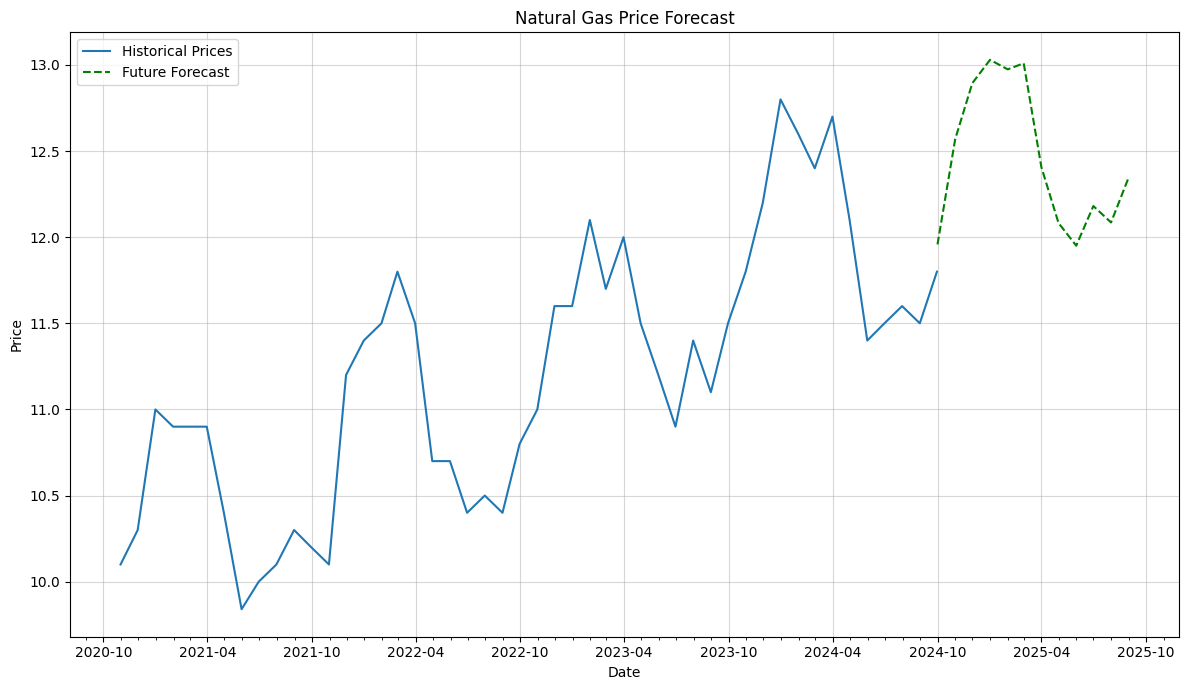

In [7]:
plt.figure(figsize=(12, 7))
plt.plot(nat_gas_df.index, nat_gas_df['Prices'], label='Historical Prices')
plt.plot(future_pred.index, future_pred, label='Future Forecast', linestyle='--', color='green')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))

plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Natural Gas Price Forecast")
plt.legend()
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()